<a href="https://colab.research.google.com/github/manvendra-07/DL-Lab/blob/main/Week%203/200968146_DL_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt

##Importing the datasets

> MNIST

> CIFAR-10

In [3]:
mnist = tf.keras.datasets.mnist
cifar = tf.keras.datasets.cifar10

##Defining function to perfrom various pre-processing steps.

In [4]:
def preProcess(dataset):
  (X_train, Y_train), (X_test, Y_test) = dataset.load_data()
  print(f"Number of classes in {dataset} : {len(np.unique(Y_train))}\n")
  
  print(f"Dimensions of each image = {X_train[0].shape}\n")
  
  print("One Image from each class : \n")

  x,id = np.unique(Y_train, return_index=True)
  plt.figure(figsize=(10,10))
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[id[i]])

  
  print(f"\nMax value of each image = {np.max(X_train[0])}\nMin value of each image = {np.min(X_train[0])}\n")
  X_train = X_train / np.max(X_train[0])
  X_test = X_test / np.max(X_train[0])

## Applying the required pre-processing on the datasets

Pre-Processing for CIFAR-10 Dataset

Number of classes in <module 'keras.api._v2.keras.datasets.cifar10' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/cifar10/__init__.py'> : 10

Dimensions of each image = (32, 32, 3)

One Image from each class : 


Max value of each image = 255
Min value of each image = 0



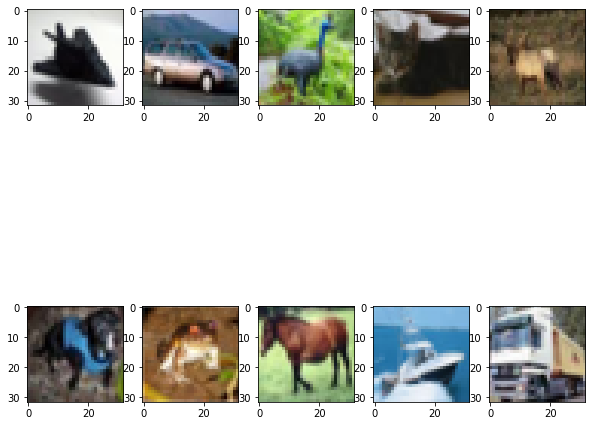

In [5]:
print("Pre-Processing for CIFAR-10 Dataset\n")
preProcess(cifar)

##Designing the architectures

**Designing a CNN Model with One Convolution Layer and One Pooling Layer (using MaxPooling)**

> One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding = 0

> One Pooling layerwhich uses MAXPOOLINGwith stride =2

> One hidden layer having number of neurons = 100

> ReLU activation function after each convolution layer

In [6]:
def OneConv2D(dataset, shape, epochs, batch_size):
  (X_train, Y_train), (X_test, Y_test) = dataset.load_data()
  X_train = X_train / np.max(X_train[0])
  X_test = X_test / np.max(X_train[0])

  model = tf.keras.Sequential()
  model.add(tf.keras.Input(shape=shape, name = "ConvolutionInput"))
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu', padding='valid', name = "ConvolutionLayer-1"))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), name = "PoolingLayer-1"))
  model.add(tf.keras.layers.Flatten(name = "NeuralNetInput"))
  model.add(tf.keras.layers.Dense(100, activation='relu', name = "HiddenLayer-1"))
  model.add(tf.keras.layers.Dense(10, activation='softmax', name = "OutputLayer"))
  model.summary()

  model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
  history = model.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs, validation_split=0.15, verbose = 2)

  ##Visualisation
  sns.set_style("darkgrid")

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  #Train and validation accuracy
  plt.plot(epochs, acc, 'b', label='Training accurarcy')
  plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
  plt.xlabel('Epoch #')
  plt.ylabel('accuracy')
  plt.title('Training and Validation accurarcy')
  plt.legend()

  #Train and validation loss
  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('Epoch #')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

  test = model.evaluate(X_test, Y_test)
  return test

**Designing a CNN Model with Two Convolution Layers and One Pooling Layer (using MaxPooling)**

> Two back-to-backConvolution layerswhich uses 32 kernels each of size 3x3, stride = 1 and, padding = 0

> One Pooling layer which uses MAXPOOLING with stride =2.

> One hidden layer having number of neurons = 100

> ReLU activation function after each convolution layer

In [7]:
def TwoConv2D(dataset, shape, epochs, batch_size):
  (X_train, Y_train), (X_test, Y_test) = dataset.load_data()
  X_train = X_train / np.max(X_train[0])
  X_test = X_test / np.max(X_train[0])

  model = tf.keras.Sequential()
  model.add(tf.keras.Input(shape=shape, name = "ConvolutionInput"))
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', name = "ConvolutionLayer-1"))
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='valid', name = "ConvolutionLayer-2"))

  model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), name = "PoolingLayer-1"))
  model.add(tf.keras.layers.Flatten(name = "NeuralNetInput"))
  model.add(tf.keras.layers.Dense(100, activation='relu', name = "HiddenLayer-1"))
  model.add(tf.keras.layers.Dense(10, activation='softmax', name = "OutputLayer"))
  model.summary()

  model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
  history = model.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs, validation_split=0.15, verbose = 2)
  
  ##Visualisation
  sns.set_style("darkgrid")

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  epochs = range(1, len(acc) + 1)

  #Train and validation accuracy
  plt.plot(epochs, acc, 'b', label='Training accurarcy')
  plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
  plt.xlabel('Epoch #')
  plt.ylabel('accuracy')
  plt.title('Training and Validation accurarcy')
  plt.legend()

  #Train and validation loss
  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('Epoch #')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()
  test = model.evaluate(X_test, Y_test)
  return test

**Designing a LeNet-5 Architecture**

**Using the Sequential API for creation :**

> One Convolution Layer with 6 kernels of size 5x5

> One Pooling Layer with pool size as 2x2

> One Convolution Layer with 16 kernels of size 5x5

> One Pooling Layer with pool size as 2x2

>> **Activation : tanh after each Convolution layer**

> Flattening the input to a fully connected Neural Net

> One Hidden Layer of 120 neurons  
>>  **Activation : sigmoid**

> One Hidden Layer of 84 neurons
>> **Activation : sigmoid**


> Output layer  of 10 neurons
>> **Activation : softmax**

In [8]:
def LeNet5(dataset, shape, epochs, batch_size):
  (X_train, Y_train), (X_test, Y_test) = dataset.load_data()
  X_train = X_train / np.max(X_train[0])
  X_test = X_test / np.max(X_train[0])

  model = tf.keras.Sequential()
  model.add(tf.keras.Input(shape=shape, name = "ConvolutionInput"))

  model.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5), activation='tanh', padding='valid', name = "ConvolutionLayer-1"))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), name = "PoolingLayer-1"))
  model.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5), activation='tanh', padding='valid', name = "ConvolutionLayer-2"))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2), name = "PoolingLayer-2"))

  model.add(tf.keras.layers.Flatten(name = "NeuralNetInput"))
  model.add(tf.keras.layers.Dense(120, activation='sigmoid', name = "HiddenLayer-1"))
  model.add(tf.keras.layers.Dense(84, activation='sigmoid', name = "HiddenLayer-2"))
  
  model.add(tf.keras.layers.Dense(10, activation='softmax', name = "OutputLayer"))
  model.summary()
  model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
  history = model.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs, validation_split=0.15, verbose = 2)

  sns.set_style("darkgrid")
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  #Train and validation accuracy
  plt.plot(epochs, acc, 'b', label='Training accurarcy')
  plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
  plt.xlabel('Epoch #')
  plt.ylabel('accuracy')
  plt.title('Training and Validation accurarcy')
  plt.legend()

  #Train and validation loss
  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('Epoch #')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

  test = model.evaluate(X_test, Y_test)
  return test

In [9]:
shape = [(28,28,1), (32,32,3)]

**Testing the three-architectures on MNIST dataset**
> **Model 1 : One Convolution Layer**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer-1 (Conv2D)  (None, 24, 24, 32)       832       
                                                                 
 PoolingLayer-1 (MaxPooling2  (None, 12, 12, 32)       0         
 D)                                                              
                                                                 
 NeuralNetInput (Flatten)    (None, 4608)              0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 100)               460900    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
__________________________________________________

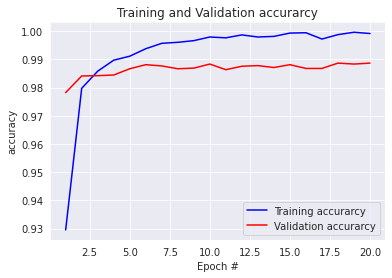

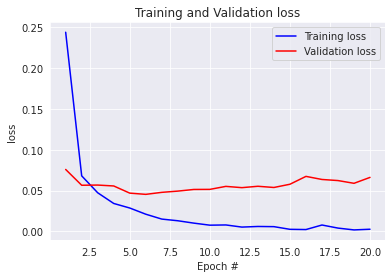

313/313 [==============================] - 1s 3ms/step - loss: 26.4404 - accuracy: 0.9767


In [10]:
model_1 = OneConv2D(mnist, shape=shape[0], epochs=20, batch_size=128)

> **Model 2 : Two Convolution Layers**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer-1 (Conv2D)  (None, 26, 26, 32)       320       
                                                                 
 ConvolutionLayer-2 (Conv2D)  (None, 24, 24, 32)       9248      
                                                                 
 PoolingLayer-1 (MaxPooling2  (None, 12, 12, 32)       0         
 D)                                                              
                                                                 
 NeuralNetInput (Flatten)    (None, 4608)              0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 100)               460900    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                      

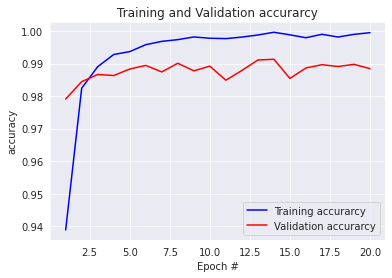

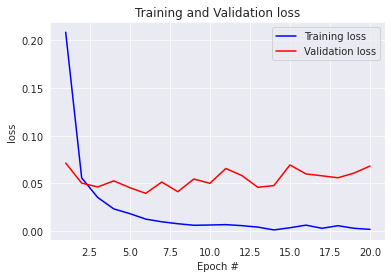

313/313 [==============================] - 1s 3ms/step - loss: 13.5923 - accuracy: 0.9899


In [11]:
model_2 = TwoConv2D(mnist, shape=shape[0], epochs=20, batch_size=128)

> **Model 3 : LeNet-5**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer-1 (Conv2D)  (None, 24, 24, 6)        156       
                                                                 
 PoolingLayer-1 (MaxPooling2  (None, 12, 12, 6)        0         
 D)                                                              
                                                                 
 ConvolutionLayer-2 (Conv2D)  (None, 8, 8, 16)         2416      
                                                                 
 PoolingLayer-2 (MaxPooling2  (None, 4, 4, 16)         0         
 D)                                                              
                                                                 
 NeuralNetInput (Flatten)    (None, 256)               0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 120)              

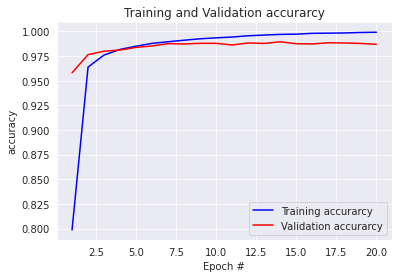

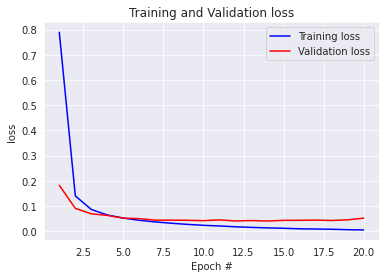

313/313 [==============================] - 1s 3ms/step - loss: 0.2070 - accuracy: 0.9451


In [12]:
model_3 = LeNet5(mnist, shape=shape[0], epochs=20, batch_size=128)

**Testing the three-architectures on CIFAR-10 dataset**
> **Model 1 : One Convolution Layer**

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer-1 (Conv2D)  (None, 28, 28, 32)       2432      
                                                                 
 PoolingLayer-1 (MaxPooling2  (None, 14, 14, 32)       0         
 D)                                                              
                                                                 
 NeuralNetInput (Flatten)    (None, 6272)              0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 100)               627300    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 630,742
Trainable params: 630,742
Non-trainable params: 0
________________________________________________

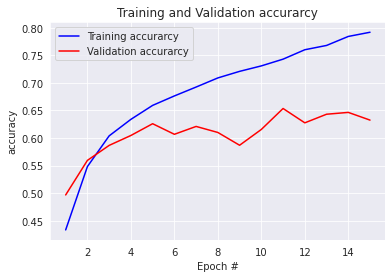

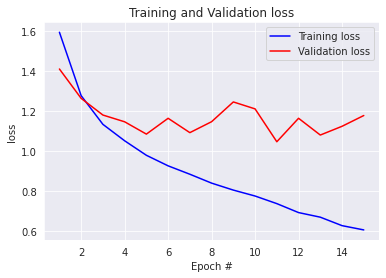

313/313 [==============================] - 1s 3ms/step - loss: 363.6276 - accuracy: 0.5052


In [17]:
model_4 = OneConv2D(cifar, shape=shape[1], epochs=15, batch_size=128)

> **Model 2 : Two Convolution Layers**

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer-1 (Conv2D)  (None, 30, 30, 32)       896       
                                                                 
 ConvolutionLayer-2 (Conv2D)  (None, 28, 28, 32)       9248      
                                                                 
 PoolingLayer-1 (MaxPooling2  (None, 14, 14, 32)       0         
 D)                                                              
                                                                 
 NeuralNetInput (Flatten)    (None, 6272)              0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 100)               627300    
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                      

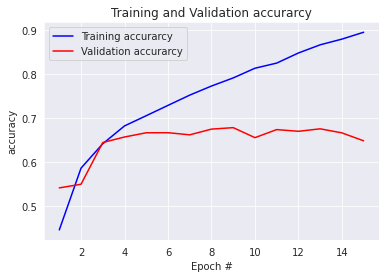

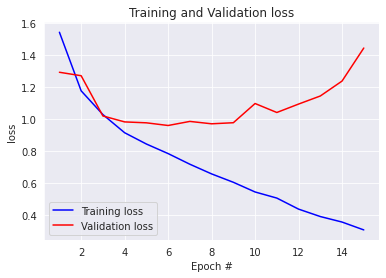

313/313 [==============================] - 1s 3ms/step - loss: 381.2209 - accuracy: 0.5339


In [18]:
model_5 = TwoConv2D(cifar, shape=shape[1], epochs=15, batch_size=128)

> **Model 3 : LeNet-5**

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer-1 (Conv2D)  (None, 28, 28, 6)        456       
                                                                 
 PoolingLayer-1 (MaxPooling2  (None, 14, 14, 6)        0         
 D)                                                              
                                                                 
 ConvolutionLayer-2 (Conv2D)  (None, 10, 10, 16)       2416      
                                                                 
 PoolingLayer-2 (MaxPooling2  (None, 5, 5, 16)         0         
 D)                                                              
                                                                 
 NeuralNetInput (Flatten)    (None, 400)               0         
                                                                 
 HiddenLayer-1 (Dense)       (None, 120)              

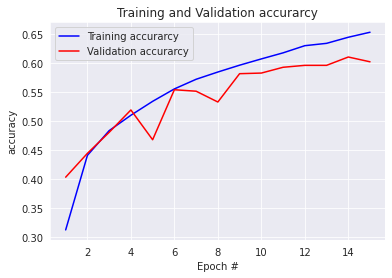

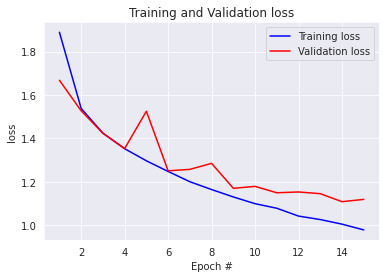

313/313 [==============================] - 1s 3ms/step - loss: 2.5844 - accuracy: 0.3265


In [19]:
model_6 = LeNet5(cifar, shape=shape[1], epochs=15, batch_size=128)

In [20]:
from tabulate import tabulate
table = [['Dataset', 'Model 1', 'Model 2', 'LeNet-5'],
         ['MNIST', model_1[1], model_2[1], model_3[1]],
         ['CIFAR-10', model_4[1], model_5[1], model_6[1]]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════╤═══════════╤═══════════╤═══════════╕
│ Dataset   │   Model 1 │   Model 2 │   LeNet-5 │
╞═══════════╪═══════════╪═══════════╪═══════════╡
│ MNIST     │    0.9767 │    0.9899 │    0.9451 │
├───────────┼───────────┼───────────┼───────────┤
│ CIFAR-10  │    0.5052 │    0.5339 │    0.3265 │
╘═══════════╧═══════════╧═══════════╧═══════════╛


##Observations

**As seen above that all the models have no issues with classification over the MNIST dataset since it is a benchmark dataset but with the CIFAR-10 dataset, that's where things start to change :**

> After approximately 10 epochs all the models start to show increase in validation loss even if the testing loss keeps decreasing showing overfiting. Therefore stopping the training around 10 epochs can help produce better results

> Even though the dataset doesn't have any class imbalance since it has 5000 instatnces of each class in the test set. 
>>(information acquired from documentation and metadata)

> All in all the Model architecture having Two Convolution layers can be considered the best overall.

> One more thing of interest is that even with such huge testing losses the models give test accuracy of over **50% (incase of CIFAR-10)** and over **90% (incase of MNIST)**